<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h1>🗳️ Electoral Census — Analysis of Participation in Colombia (2006–2022)</h1>
  <p>This notebook analyzes the evolution of <strong>electoral participation in Colombia</strong> between 2006 and 2022, using official data from 
  <a href="https://www.datoselectorales.org/">datoselectorales.org</a>, the national political-electoral information system. 
  This platform captures, systematizes, and publishes relevant electoral information, ensuring transparency and accessibility for researchers, institutions, and citizens.</p>

  <h2>📁 Dataset Overview</h2>
  <p>We use the <strong>Electoral Census Dataset (2006–2022)</strong>, which provides information on the number of registered voters, turnout levels, and participation trends across Colombia.</p>

  <h2>📌 Key Objectives</h2>
  <ul>
    <li>🔍 Identify changes in electoral participation over time.</li>
    <li>🌎 Highlight regional contrasts in voter registration and turnout.</li>
    <li>📈 Analyze long-term trends in democratic engagement in Colombia.</li>
  </ul>

  <blockquote>This analysis aims to uncover patterns and historical shifts in electoral participation, contributing to a deeper understanding of Colombia’s democratic dynamics.</blockquote>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h1>🗳️ Censo Electoral — Análisis de la Participación en Colombia (2006–2022)</h1>
  <p>Este notebook analiza la evolución de la <strong>participación electoral en Colombia</strong> entre 2006 y 2022, utilizando datos oficiales de 
  <a href="https://www.datoselectorales.org/">datoselectorales.org</a>, el sistema nacional de información político-electoral. 
  Esta plataforma captura, sistematiza y publica información relevante en materia electoral, garantizando transparencia y accesibilidad para investigadores, instituciones y ciudadanía.</p>

  <h2>📁 Conjunto de datos</h2>
  <p>Se utiliza el <strong>Dataset del Censo Electoral (2006–2022)</strong>, que contiene información sobre el número de votantes inscritos, niveles de participación y tendencias de asistencia en Colombia.</p>

  <h2>📌 Objetivos clave</h2>
  <ul>
    <li>🔍 Identificar cambios en la participación electoral a lo largo del tiempo.</li>
    <li>🌎 Resaltar contrastes regionales en inscripción y asistencia de votantes.</li>
    <li>📈 Analizar tendencias históricas en el compromiso democrático en Colombia.</li>
  </ul>

  <blockquote>Este análisis busca identificar patrones y cambios históricos en la participación electoral, contribuyendo a una comprensión más profunda de las dinámicas democráticas en Colombia.</blockquote>
</div>

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>Importación de librerías / Library import</h2>
  <p>Se importan las librerías necesarias para el análisis de datos (<code>pandas</code>, <code>numpy</code>, <code>unicodedata</code>, entre otras).  
  <em>Objetivo:</em> Contar con las herramientas básicas para manipular, limpiar y visualizar la información.</p>
  
  <p>The required libraries for data analysis are imported (<code>pandas</code>, <code>numpy</code>, <code>unicodedata</code>, among others).  
  <em>Objective:</em> Provide the essential tools to manipulate, clean, and visualize the dataset.</p>
</div>

In [8]:
# Importaciones
import pandas as pd
import geopandas as gpd
import folium
import unicodedata
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from IPython.display import display, Markdown, IFrame, HTML

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📥 Extracción de los datos / Data extraction</h2>
    <p> Se descarga el conjunto de datos directamente desde 
    <a href="https://www.datoselectorales.org/">datoselectorales.org</a>, 
    el sistema de información político electoral de Colombia. 
    Este dataset corresponde al <strong>censo electoral 2006–2022</strong>, 
    que incluye el número de ciudadanos inscritos y la evolución de la participación electoral.</p> 
    <p>The dataset is downloaded directly from 
    <a href="https://www.datoselectorales.org/">datoselectorales.org</a>, 
    Colombia’s political-electoral information system. 
    This dataset corresponds to the <strong>Electoral Census 2006–2022</strong>, 
    including the number of registered voters and the evolution of electoral participation.</p>
</div>

In [9]:
# Cargar dataset
ruta_dataset = "../data/raw/censo_electoral.csv"
dataset = pd.read_csv(ruta_dataset, low_memory=False)

# Ver columnas y primeras filas
print("Columnas originales:", dataset.columns.tolist())
print(dataset.head(3))

Columnas originales: ['code_dane', 'ano', 'eleccion', '_zona', 'zona', 'puesto', 'departamento', 'municipio', 'puesto2', 'mujeres', 'hombres', 'total', 'mesas', 'rcd___id']
   code_dane   ano     eleccion  _zona    zona puesto departamento municipio  \
0       5001  2022  Presidencia    1.0  Urbana      1    ANTIOQUIA  MEDELLIN   
1       5001  2022  Presidencia    1.0  Urbana      2    ANTIOQUIA  MEDELLIN   
2       5001  2022  Presidencia    1.0  Urbana      3    ANTIOQUIA  MEDELLIN   

                                puesto2  mujeres  hombres    total  mesas  \
0           SEC. ESC. LA ESPERANZA No 2     4975     7439  12414.0     32   
1              INST.EDUC. LA CANDELARIA    10595     6750  17345.0     45   
2  IE.MARIA DE LOS ANGELES CANO MARQUEZ     4140     3392   7532.0     20   

   rcd___id  
0  vv89p7vv  
1  669a3k06  
2  0e3r3gkj  


<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>🔎 Exploración inicial de los datos / Exploratory data analysis</h2>
  
  <p><strong>Visualizar primeras filas:</strong> Se utiliza <code>dataset.head()</code> para observar la estructura inicial del conjunto de datos y confirmar que las columnas se cargaron correctamente.  
  <em>Objetivo:</em> Tener una primera impresión de la información disponible.</p>
  
  <p><strong>View first rows:</strong> The <code>dataset.head()</code> function is used to inspect the initial structure of the dataset and confirm that the columns were loaded correctly.  
  <em>Objective:</em> Obtain a first impression of the available information.</p>
  
  <p><strong>Valores únicos:</strong> Se revisan los valores únicos en columnas clave como <code>departamento</code>, <code>municipio</code> y <code>eleccion</code>.  
  <em>Objetivo:</em> Identificar categorías relevantes y posibles inconsistencias en los nombres.</p>
  
  <p><strong>Unique values:</strong> Unique values are checked in key columns such as <code>departamento</code>, <code>municipio</code>, and <code>eleccion</code>.  
  <em>Objective:</em> Identify relevant categories and potential inconsistencies in naming.</p>
  
  <p><strong>Estadísticas descriptivas:</strong> Se aplican funciones como <code>dataset.describe()</code> para obtener medidas básicas (mínimo, máximo, promedio) en las columnas numéricas.  
  <em>Objetivo:</em> Conocer la distribución inicial de los datos y detectar valores atípicos.</p>
  
  <p><strong>Descriptive statistics:</strong> Functions such as <code>dataset.describe()</code> are applied to obtain basic measures (minimum, maximum, mean) in numeric columns.  
  <em>Objective:</em> Understand the initial distribution of the data and detect outliers.</p>
</div>

In [10]:
# Eliminar columnas irrelevantes
dataset = dataset.drop(columns=["_zona", "zona", "puesto", "puesto2", "mesas", "rcd___id"])

In [11]:
# Función para limpiar texto
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower().strip()
    texto = "".join(c for c in unicodedata.normalize("NFD", texto)
                    if unicodedata.category(c) != "Mn")
    texto = texto.replace("ñ", "n")
    return texto

In [12]:
# Aplicar limpieza
dataset["departamento"] = dataset["departamento"].apply(limpiar_texto)
dataset["municipio"] = dataset["municipio"].apply(limpiar_texto)
dataset["eleccion"] = dataset["eleccion"].apply(limpiar_texto)

In [13]:
# Convertir columnas numéricas
for col in ["mujeres", "hombres", "total"]:
    dataset[col] = pd.to_numeric(dataset[col], errors="coerce").fillna(0)

In [14]:
# Agrupar datos
censo_departamentos = (
    dataset.groupby(["departamento", "ano", "eleccion"], as_index=False)[["mujeres", "hombres", "total"]]
    .sum()
)


print("✅ Datos agrupados por departamento, año y elección")
print(censo_departamentos.head())

# Guardar dataset limpio
censo_departamentos.to_csv("../data/processed/censo_departamentos_limpio.csv", index=False)

✅ Datos agrupados por departamento, año y elección
  departamento   ano  eleccion  mujeres  hombres    total
0     amazonas  2006  congreso    14628    15616  30244.0
1     amazonas  2007   locales    16819    15862  32681.0
2     amazonas  2010  congreso    17542    18504  36046.0
3     amazonas  2011   locales    19789    18727  38516.0
4     amazonas  2014  congreso    20978    19905  40883.0


<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📈 Visualización de la participación / Participation visualization</h2>
  
  <p><strong>Configurar estilo:</strong> Se utiliza <code>sns.set()</code> con estilo <em>whitegrid</em> y contexto <em>talk</em> para un diseño moderno y claro.  
  <em>Objective:</em> Improve readability and aesthetics of the chart.</p>
  
  <p><strong>Definir colores:</strong> Se asignan colores personalizados para cada tipo de elección (<span style="color:#1f77b4;">azul</span> para Presidencia y <span style="color:#ff7f0e;">naranja</span> para Congreso).  
  <em>Objective:</em> Differentiate election types visually.</p>
  
  <p><strong>Graficar líneas:</strong> Se filtran los datos por tipo de elección y se agrupan por año, sumando el total de votantes. Se dibuja una línea con marcadores circulares para cada serie.  
  <em>Objective:</em> Show the evolution of voter participation in presidential and congressional elections.</p>
  
  <p><strong>Etiquetas numéricas:</strong> Se añaden etiquetas sobre cada punto con el número de votantes, usando separadores de miles para mayor claridad.  
  <em>Objective:</em> Provide exact values directly on the chart for easier interpretation.</p>
  
  <p><strong>Títulos y ejes:</strong> Se define un título descriptivo, etiquetas para los ejes y formato de números con separadores de miles.  
  <em>Objective:</em> Ensure clarity and context for the visualization.</p>
  
  <p><strong>Leyenda y diseño:</strong> Se añade una leyenda con el título “Tipo de elección”, se ajusta la cuadrícula y se aplica <code>tight_layout()</code> para optimizar la presentación.  
  <em>Objective:</em> Make the chart clean, informative, and visually appealing.</p>
</div>

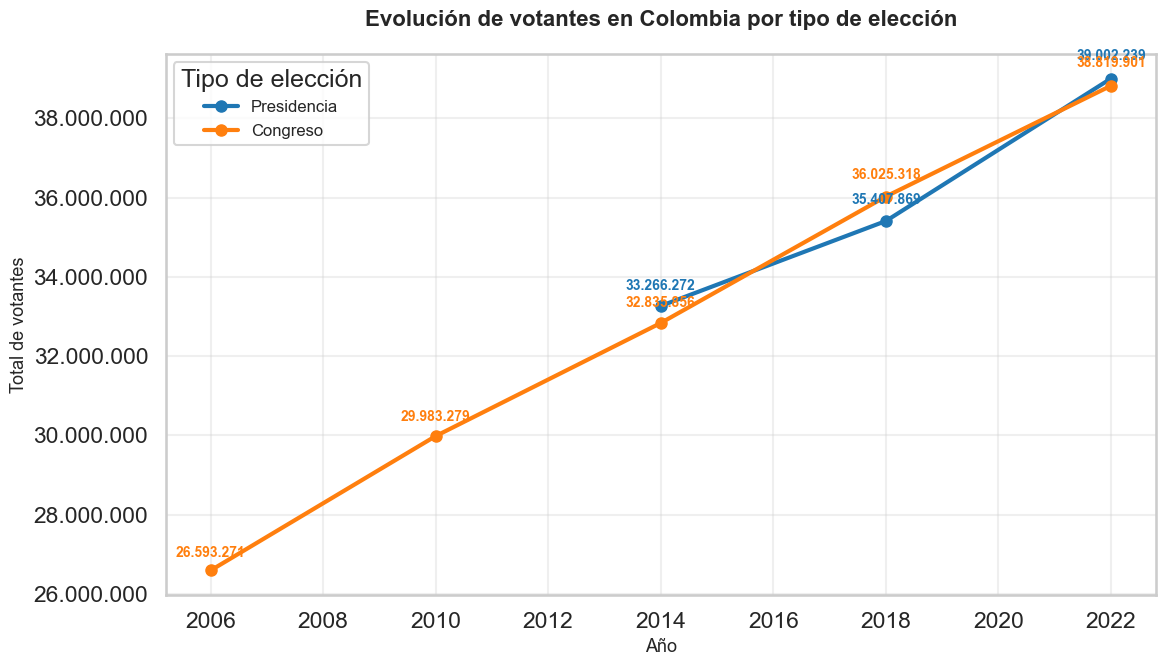

In [15]:
# Gráfico de líneas Presidencia y Congreso

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 7))

# Colores personalizados para cada tipo de elección
colores = {
    "presidencia": "#1f77b4",  # Azul
    "congreso": "#ff7f0e"      # Naranja
}

# Graficar líneas
for eleccion in ["presidencia", "congreso"]:
    filtro = censo_departamentos[censo_departamentos["eleccion"] == eleccion]
    serie = filtro.groupby("ano")["total"].sum()
    
    # Línea principal
    plt.plot(
        serie.index, serie.values,
        marker="o",
        color=colores[eleccion],
        linewidth=3,
        markersize=8,
        label=eleccion.capitalize()
    )
    
    # Etiquetas numéricas sobre los puntos
    for x, y in zip(serie.index, serie.values):
        plt.text(x, y + (y * 0.01), f"{int(y):,}".replace(",", "."), 
                 ha='center', va='bottom', fontsize=10, color=colores[eleccion], fontweight='bold')

# Títulos y ejes
plt.title("Evolución de votantes en Colombia por tipo de elección", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Año", fontsize=13)
plt.ylabel("Total de votantes", fontsize=13)

# Formato del eje Y con separadores de miles
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Leyenda y diseño
plt.legend(title="Tipo de elección", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar
plt.show()

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>🗺️ Mapa coroplético por elección (2022) / Choropleth map by election (2022)</h2>
  
  <p><strong>Cargar shapefile:</strong> Se lee el archivo <code>geoBoundaries-COL-ADM1.geojson</code> con <code>geopandas</code>, que contiene los límites geográficos de los departamentos de Colombia.  
  <em>Objective:</em> Provide the geographic base for mapping electoral data.</p>
  
  <p><strong>Normalizar nombres:</strong> Se aplica la función <code>limpiar_texto</code> a la columna <code>shapeName</code> para asegurar coincidencia con los nombres de departamentos en el dataset.  
  <em>Objective:</em> Ensure consistency between geographic and electoral datasets.</p>
  
  <p><strong>Filtrar año 2022:</strong> Se seleccionan únicamente los registros correspondientes al año 2022 del censo electoral.  
  <em>Objective:</em> Focus the analysis on the most recent election year.</p>
  
  <p><strong>Definir paleta de colores:</strong> Se asignan esquemas cromáticos distintos para cada tipo de elección (<span style="color:#1f77b4;">Blues</span> para Presidencia y <span style="color:#ff7f0e;">YlOrBr</span> para Congreso).  
  <em>Objective:</em> Differentiate election types visually.</p>
  
  <p><strong>Generar mapas:</strong> Para cada tipo de elección se agrupan los votos por departamento, se unen con el shapefile y se crea un mapa coroplético con <code>folium.Choropleth</code>.  
  <em>Objective:</em> Display voter totals by department in an interactive geographic visualization.</p>
  
  <p><strong>Tooltip interactivo:</strong> Se añade un <code>GeoJsonTooltip</code> que muestra el nombre del departamento y el total de votantes al pasar el cursor.  
  <em>Objective:</em> Provide detailed information on hover for each region.</p>
  
  <p><strong>Guardar y mostrar:</strong> Cada mapa se guarda como archivo HTML y se previsualiza dentro del notebook con <code>IFrame</code>.  
  <em>Objective:</em> Make the maps reusable and easy to share or embed in reports.</p>
</div>

In [16]:
# Mapa coroplético por elección (2022)

# Ruta del GeoJSON de departamentos
geo_path = "../mapas/geoBoundaries-COL-ADM1.geojson"
departamentos = gpd.read_file(geo_path)

# Limpiar nombres para coincidencia
departamentos["shapeName"] = departamentos["shapeName"].apply(limpiar_texto)

# 📅 Filtrar solo el año 2022
censo_2022 = censo_departamentos[censo_departamentos["ano"] == 2022]

# 🎨 Colores personalizados por tipo de elección
colores = {
    "presidencia": "Blues",
    "congreso": "YlOrBr"   
}

# Filtrar elecciones y generar mapas
mapas_generados = {}

for tipo in ["presidencia", "congreso"]:
    filtro = censo_2022[censo_2022["eleccion"] == tipo]
    agg = filtro.groupby("departamento")[["total"]].sum().reset_index()

    # Unir con shapefile
    geo_merged = departamentos.merge(agg, left_on="shapeName", right_on="departamento", how="left")
    geo_merged["total"] = geo_merged["total"].fillna(0)

    # Crear mapa
    m = folium.Map(location=[4.5709, -74.2973], zoom_start=6, tiles="CartoDB positron")
    folium.Choropleth(
        geo_data=geo_merged,
        data=geo_merged,
        columns=["shapeName", "total"],
        key_on="feature.properties.shapeName",
        fill_color=colores[tipo],
        fill_opacity=0.75,
        line_opacity=0.4,
        legend_name=f"Total de votantes - Elección de {tipo.capitalize()} (2022)",
        nan_fill_color="white",
    ).add_to(m)

    # Tooltip interactivo
    folium.GeoJson(
        geo_merged,
        name="Datos",
        tooltip=folium.GeoJsonTooltip(
            fields=["shapeName", "total"],
            aliases=["Departamento:", "Total de votantes:"],
            sticky=False
        ),
    ).add_to(m)

    # Guardar mapa como HTML
    ruta_mapa = f"../mapas/mapa_censo_{tipo}_2022.html"
    m.save(ruta_mapa)
    mapas_generados[tipo.capitalize()] = ruta_mapa

    print(f"✅ Mapa guardado: {ruta_mapa}")

✅ Mapa guardado: ../mapas/mapa_censo_presidencia_2022.html
✅ Mapa guardado: ../mapas/mapa_censo_congreso_2022.html


In [17]:
# Mostrar mapas de vista previa en el notebook

for tipo, ruta in mapas_generados.items():
    print(f"\n🗳️ {tipo} 2022")
    display(IFrame(src=ruta, width="100%", height=600))

print("🎯 Listo: mapas generados y previsualizados correctamente para el año 2022.")


🗳️ Presidencia 2022



🗳️ Congreso 2022


🎯 Listo: mapas generados y previsualizados correctamente para el año 2022.


<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>⚖️ Comparación de votantes — Presidencia vs Congreso (2022) / Voter comparison — Presidency vs Congress (2022)</h2>
  
  <p><strong>Crear DataFrames base:</strong> Se filtran los datos del año 2022 para cada tipo de elección (<code>presidencia</code> y <code>congreso</code>), agrupando por departamento y sumando el total de votantes.  
  <em>Objective:</em> Obtain separate totals for each election type by department.</p>
  
  <p><strong>Merge de resultados:</strong> Se unen ambos DataFrames en uno solo, calculando la <code>diferencia</code> absoluta y la <code>variación_%</code> relativa entre Presidencia y Congreso.  
  <em>Objective:</em> Compare participation levels across election types.</p>
  
  <p><strong>Ordenar resultados:</strong> Se ordena la tabla por el total más alto en Presidencia, mostrando los primeros 10 departamentos.  
  <em>Objective:</em> Highlight the regions with the largest presidential turnout.</p>
  
  <p><strong>Gráfico comparativo:</strong> Se genera un gráfico de barras agrupadas, donde cada departamento muestra dos columnas: una para Congreso (naranja) y otra para Presidencia (azul).  
  <em>Objective:</em> Visualize differences in voter participation by department.</p>
  
  <p><strong>Top 10 diferencias absolutas:</strong> Se identifican los departamentos con mayor diferencia de votantes entre Presidencia y Congreso, tanto positiva como negativa.  
  <em>Objective:</em> Detect regions with the strongest contrasts in electoral participation.</p>
</div>

📋 Comparación Presidencia vs Congreso (2022):


,departamento,presidencia_total,congreso_total,diferencia,variacion_%
0,bogota,5935722.0,5967518.0,-31796.0,-0.53
1,antioquia,5115071.0,5066849.0,48222.0,0.95
2,valle,3675242.0,3669369.0,5873.0,0.16
3,cundinamarca,2125131.0,2070075.0,55056.0,2.66
4,atlantico,2016146.0,2010688.0,5458.0,0.27
5,santander,1776177.0,1772930.0,3247.0,0.18
6,bolivar,1692147.0,1689985.0,2162.0,0.13
7,cordoba,1319838.0,1319790.0,48.0,0.00
8,norte de santander,1296482.0,1296763.0,-281.0,-0.02
9,narino,1177948.0,1179842.0,-1894.0,-0.16


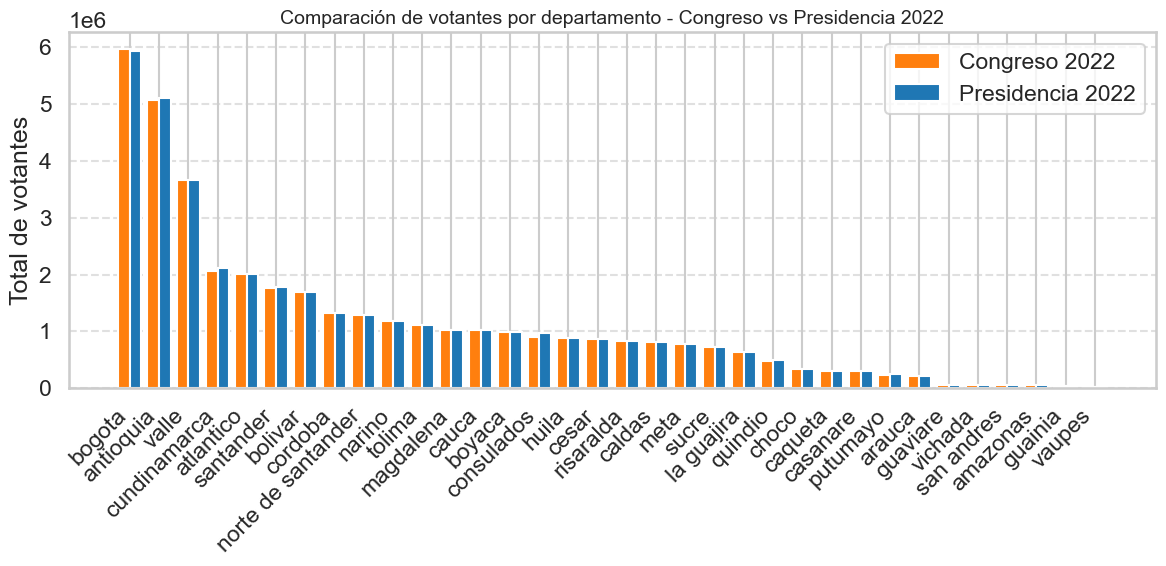

📈 Departamentos con mayor diferencia de votantes entre Presidencia y Congreso (2022):


,departamento,presidencia_total,congreso_total,diferencia,variacion_%
14,consulados,972764.0,908566.0,64198.0,7.07
3,cundinamarca,2125131.0,2070075.0,55056.0,2.66
1,antioquia,5115071.0,5066849.0,48222.0,0.95
0,bogota,5935722.0,5967518.0,-31796.0,-0.53
19,meta,787684.0,780856.0,6828.0,0.87
2,valle,3675242.0,3669369.0,5873.0,0.16
17,risaralda,839253.0,833603.0,5650.0,0.68
4,atlantico,2016146.0,2010688.0,5458.0,0.27
12,cauca,1023586.0,1019110.0,4476.0,0.44
10,tolima,1120219.0,1116617.0,3602.0,0.32


In [18]:
# Comparación: Votantes en Presidencia vs Congreso (2022)

# Crear DataFrames base
presidencia_2022 = censo_departamentos[
    (censo_departamentos["ano"] == 2022) & (censo_departamentos["eleccion"] == "presidencia")
].groupby("departamento")[["total"]].sum().rename(columns={"total": "presidencia_total"})

congreso_2022 = censo_departamentos[
    (censo_departamentos["ano"] == 2022) & (censo_departamentos["eleccion"] == "congreso")
].groupby("departamento")[["total"]].sum().rename(columns={"total": "congreso_total"})

# Unir ambos
comparacion = presidencia_2022.merge(congreso_2022, left_index=True, right_index=True)
comparacion["diferencia"] = comparacion["presidencia_total"] - comparacion["congreso_total"]
comparacion["variacion_%"] = (
    (comparacion["diferencia"] / comparacion["congreso_total"]) * 100
).round(2)

# Ordenar por total más alto en presidencia
comparacion = comparacion.sort_values(by="presidencia_total", ascending=False).reset_index()

# Mostrar tabla
print("📋 Comparación Presidencia vs Congreso (2022):")
display(comparacion.head(10))

# =========================================================
# Gráfico comparativo
# =========================================================
plt.figure(figsize=(12, 6))
x = range(len(comparacion))

plt.bar(x, comparacion["congreso_total"], color="#ff7f0e", width=0.4, label="Congreso 2022")
plt.bar(
    [i + 0.4 for i in x],
    comparacion["presidencia_total"],
    color="#1f77b4",
    width=0.4,
    label="Presidencia 2022",
)

plt.xticks([i + 0.2 for i in x], comparacion["departamento"], rotation=45, ha="right")
plt.title("Comparación de votantes por departamento - Congreso vs Presidencia 2022", fontsize=14)
plt.ylabel("Total de votantes")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# =========================================================
# Top 10 diferencias absolutas
# =========================================================
top_diferencias = comparacion.sort_values(by="diferencia", key=abs, ascending=False).head(10)
print("📈 Departamentos con mayor diferencia de votantes entre Presidencia y Congreso (2022):")
display(top_diferencias)


<div style="background-color: #e6f2ff; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🗳️ <strong>Comparative Analysis: Presidential vs Congressional Elections (2022)</strong></h2>

<h3 style="color: #1565c0;">🔹 Departments with the highest number of voters</h3>
<p>The departments with the largest number of voters in both elections were <strong>Bogotá</strong>, <strong>Antioquia</strong>, and <strong>Valle del Cauca</strong>, maintaining the same order in both electoral processes.<br>
This demonstrates a <strong>consistency in electoral participation</strong> across the country’s main regions, which concentrate a significant portion of Colombia’s electoral census.</p>

<table style="width:100%; border-collapse: collapse; margin-top: 10px;">
<thead style="background-color: #e3f2fd;">
<tr>
<th style="border: 1px solid #ccc; padding: 8px;">Rank</th>
<th style="border: 1px solid #ccc; padding: 8px;">Department</th>
<th style="border: 1px solid #ccc; padding: 8px;">Presidential Voters</th>
<th style="border: 1px solid #ccc; padding: 8px;">Congressional Voters</th>
</tr>
</thead>
<tbody>
<tr><td>1</td><td>Bogotá</td><td>5,935,722</td><td>5,967,518</td></tr>
<tr><td>2</td><td>Antioquia</td><td>5,115,071</td><td>5,066,849</td></tr>
<tr><td>3</td><td>Valle del Cauca</td><td>3,675,242</td><td>3,669,369</td></tr>
<tr><td>4</td><td>Cundinamarca</td><td>2,125,131</td><td>2,070,075</td></tr>
<tr><td>5</td><td>Atlántico</td><td>2,016,146</td><td>2,010,688</td></tr>
<tr><td>6</td><td>Santander</td><td>1,776,177</td><td>1,772,930</td></tr>
<tr><td>7</td><td>Bolívar</td><td>1,692,147</td><td>1,689,985</td></tr>
<tr><td>8</td><td>Córdoba</td><td>1,319,838</td><td>1,319,790</td></tr>
<tr><td>9</td><td>Norte de Santander</td><td>1,296,482</td><td>1,296,763</td></tr>
<tr><td>10</td><td>Nariño</td><td>1,177,948</td><td>1,179,842</td></tr>
</tbody>
</table>

<h3 style="color: #1565c0;">📊 General comparison between Presidency and Congress</h3>
<p>In most departments, participation in both elections was very similar.<br>
However, some showed <strong>slight percentage differences</strong>:</p>
<ul>
<li><strong>Cundinamarca</strong> had a notable increase of <strong>2.66%</strong> in presidential voting compared to Congress.</li>
<li><strong>Antioquia</strong> also showed a slight increase (<strong>0.95%</strong>) in participation for the Presidency.</li>
<li><strong>Bogotá</strong>, on the other hand, had a <strong>reduction of 0.53%</strong>, which may indicate lower interest or higher abstention in the presidential elections.</li>
</ul>

<h3 style="color: #1565c0;">📈 Departments with the largest voter differences</h3>
<table style="width:100%; border-collapse: collapse; margin-top: 10px;">
<thead style="background-color: #e3f2fd;">
<tr>
<th style="border: 1px solid #ccc; padding: 8px;">Department</th>
<th style="border: 1px solid #ccc; padding: 8px;">Presidency</th>
<th style="border: 1px solid #ccc; padding: 8px;">Congress</th>
<th style="border: 1px solid #ccc; padding: 8px;">Difference</th>
<th style="border: 1px solid #ccc; padding: 8px;">Variation (%)</th>
</tr>
</thead>
<tbody>
<tr><td>Consulates</td><td>972,764</td><td>908,566</td><td><strong>+64,198</strong></td><td><strong>+7.07%</strong></td></tr>
<tr><td>Cundinamarca</td><td>2,125,131</td><td>2,070,075</td><td><strong>+55,056</strong></td><td><strong>+2.66%</strong></td></tr>
<tr><td>Antioquia</td><td>5,115,071</td><td>5,066,849</td><td><strong>+48,222</strong></td><td><strong>+0.95%</strong></td></tr>
<tr><td>Bogotá</td><td>5,935,722</td><td>5,967,518</td><td><strong>−31,796</strong></td><td><strong>−0.53%</strong></td></tr>
<tr><td>Meta</td><td>787,684</td><td>780,856</td><td><strong>+6,828</strong></td><td><strong>+0.87%</strong></td></tr>
<tr><td>Valle</td><td>3,675,242</td><td>3,669,369</td><td><strong>+5,873</strong></td><td><strong>+0.16%</strong></td></tr>
<tr><td>Risaralda</td><td>839,253</td><td>833,603</td><td><strong>+5,650</strong></td><td><strong>+0.68%</strong></td></tr>
<tr><td>Atlántico</td><td>2,016,146</td><td>2,010,688</td><td><strong>+5,458</strong></td><td><strong>+0.27%</strong></td></tr>
<tr><td>Cauca</td><td>1,023,586</td><td>1,019,110</td><td><strong>+4,476</strong></td><td><strong>+0.44%</strong></td></tr>
<tr><td>Tolima</td><td>1,120,219</td><td>1,116,617</td><td><strong>+3,602</strong></td><td><strong>+0.32%</strong></td></tr>
</tbody>
</table>

<h3 style="color: #1565c0;">🧩 Conclusion</h3>
<p>Overall, electoral behavior between the Presidency and Congress in 2022 was <strong>very homogeneous</strong>.<br>
Nevertheless, three main observations stand out:</p>
<ul>
<li>The <strong>consulates</strong> (overseas voting) showed the largest variation, with more than a <strong>7%</strong> difference in favor of the Presidency.</li>
<li>Differences within the country were below <strong>3%</strong> in almost all cases.</li>
<li>The results show that citizen participation <strong>remained stable</strong> between both elections, with no drastic changes by region.</li>
</ul>
</div>


<div style="background-color: #e6ffe6; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🗳️ <strong>Análisis comparativo: Elecciones de Presidencia vs Congreso (2022)</strong></h2>

<h3 style="color: #1565c0;">🔹 Departamentos con más votantes</h3>
<p>Los departamentos con mayor número de votantes en ambas elecciones fueron <strong>Bogotá</strong>, <strong>Antioquia</strong> y <strong>Valle del Cauca</strong>, manteniendo el mismo orden en los dos procesos electorales.<br>
Esto demuestra una <strong>consistencia en la participación electoral</strong> de las principales regiones del país, que concentran gran parte del censo electoral colombiano.</p>

<table style="width:100%; border-collapse: collapse; margin-top: 10px;">
<thead style="background-color: #e3f2fd;">
<tr>
<th style="border: 1px solid #ccc; padding: 8px;">Puesto</th>
<th style="border: 1px solid #ccc; padding: 8px;">Departamento</th>
<th style="border: 1px solid #ccc; padding: 8px;">Votantes Presidencia</th>
<th style="border: 1px solid #ccc; padding: 8px;">Votantes Congreso</th>
</tr>
</thead>
<tbody>
<tr><td>1</td><td>Bogotá</td><td>5,935,722</td><td>5,967,518</td></tr>
<tr><td>2</td><td>Antioquia</td><td>5,115,071</td><td>5,066,849</td></tr>
<tr><td>3</td><td>Valle del Cauca</td><td>3,675,242</td><td>3,669,369</td></tr>
<tr><td>4</td><td>Cundinamarca</td><td>2,125,131</td><td>2,070,075</td></tr>
<tr><td>5</td><td>Atlántico</td><td>2,016,146</td><td>2,010,688</td></tr>
<tr><td>6</td><td>Santander</td><td>1,776,177</td><td>1,772,930</td></tr>
<tr><td>7</td><td>Bolívar</td><td>1,692,147</td><td>1,689,985</td></tr>
<tr><td>8</td><td>Córdoba</td><td>1,319,838</td><td>1,319,790</td></tr>
<tr><td>9</td><td>Norte de Santander</td><td>1,296,482</td><td>1,296,763</td></tr>
<tr><td>10</td><td>Nariño</td><td>1,177,948</td><td>1,179,842</td></tr>
</tbody>
</table>

<h3 style="color: #1565c0;">📊 Comparación general entre Presidencia y Congreso</h3>
<p>En la mayoría de departamentos, la participación entre ambas elecciones fue muy similar.<br>
Sin embargo, algunos presentaron <strong>ligeras diferencias porcentuales</strong>:</p>
<ul>
<li><strong>Cundinamarca</strong> tuvo un aumento notable del <strong>2.66%</strong> en las votaciones presidenciales respecto al Congreso.</li>
<li><strong>Antioquia</strong> también mostró un leve incremento (<strong>0.95%</strong>) en la participación para Presidencia.</li>
<li><strong>Bogotá</strong>, por el contrario, tuvo una <strong>reducción del 0.53%</strong>, lo que podría indicar un menor interés o mayor abstención en las presidenciales.</li>
</ul>

<h3 style="color: #1565c0;">📈 Departamentos con mayor diferencia de votantes</h3>
<table style="width:100%; border-collapse: collapse; margin-top: 10px;">
<thead style="background-color: #e3f2fd;">
<tr>
<th style="border: 1px solid #ccc; padding: 8px;">Departamento</th>
<th style="border: 1px solid #ccc; padding: 8px;">Presidencia</th>
<th style="border: 1px solid #ccc; padding: 8px;">Congreso</th>
<th style="border: 1px solid #ccc; padding: 8px;">Diferencia</th>
<th style="border: 1px solid #ccc; padding: 8px;">Variación (%)</th>
</tr>
</thead>
<tbody>
<tr><td>Consulados</td><td>972,764</td><td>908,566</td><td><strong>+64,198</strong></td><td><strong>+7.07%</strong></td></tr>
<tr><td>Cundinamarca</td><td>2,125,131</td><td>2,070,075</td><td><strong>+55,056</strong></td><td><strong>+2.66%</strong></td></tr>
<tr><td>Antioquia</td><td>5,115,071</td><td>5,066,849</td><td><strong>+48,222</strong></td><td><strong>+0.95%</strong></td></tr>
<tr><td>Bogotá</td><td>5,935,722</td><td>5,967,518</td><td><strong>−31,796</strong></td><td><strong>−0.53%</strong></td></tr>
<tr><td>Meta</td><td>787,684</td><td>780,856</td><td><strong>+6,828</strong></td><td><strong>+0.87%</strong></td></tr>
<tr><td>Valle</td><td>3,675,242</td><td>3,669,369</td><td><strong>+5,873</strong></td><td><strong>+0.16%</strong></td></tr>
<tr><td>Risaralda</td><td>839,253</td><td>833,603</td><td><strong>+5,650</strong></td><td><strong>+0.68%</strong></td></tr>
<tr><td>Atlántico</td><td>2,016,146</td><td>2,010,688</td><td><strong>+5,458</strong></td><td><strong>+0.27%</strong></td></tr>
<tr><td>Cauca</td><td>1,023,586</td><td>1,019,110</td><td><strong>+4,476</strong></td><td><strong>+0.44%</strong></td></tr>
<tr><td>Tolima</td><td>1,120,219</td><td>1,116,617</td><td><strong>+3,602</strong></td><td><strong>+0.32%</strong></td></tr>
</tbody>
</table>

<h3 style="color: #1565c0;">🧩 Conclusión</h3>
<p>En términos generales, el comportamiento electoral entre Presidencia y Congreso en 2022 fue <strong>muy homogéneo</strong>.<br>
No obstante, se destacan tres observaciones principales:</p>
<ul>
<li>Los <strong>consulados</strong> (voto en el exterior) mostraron la mayor variación, con más de un <strong>7%</strong> de diferencia a favor de la Presidencia.</li>
<li>Las diferencias en el interior del país fueron menores al <strong>3%</strong> en casi todos los casos.</li>
<li>Los resultados evidencian que la participación ciudadana <strong>se mantuvo estable</strong> entre ambas elecciones, sin cambios drásticos por región.</li>
</ul>